### 딥-러닝 과정 MLP 

## Keras 모델 생성/학습 - 보스턴 집값 예측 모델

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/Regression-Tutorial-with-Keras-Deep-Learning-Library-in-Python.jpg)

* CRIM: per capita crime rate by town  
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

In [1]:
# 1. 데이터 불러오기
import pandas as pd
df = pd.read_csv('../DLclass/BostonHousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
# 데이터 살펴보기2
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Heatmap of dfcorr by seaborn')

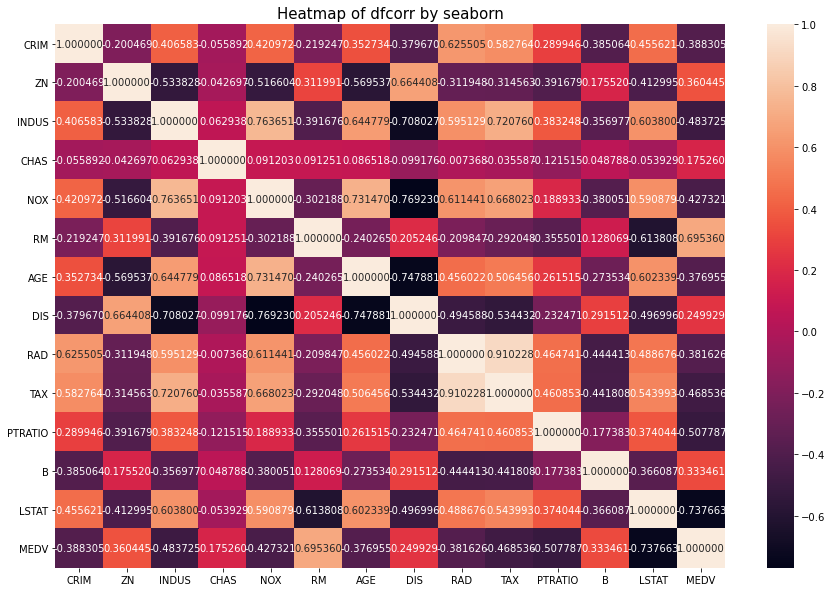

In [4]:
# 데이터 상관관계 확인
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# feature heatmap 그려보기
dfcorr = df.corr()
plt.figure(figsize=(15,10))
#sns.heatmap(dfcorr, cmap='viridis')
sns.heatmap(dfcorr, annot=True, fmt='f')
plt.title('Heatmap of dfcorr by seaborn', fontsize=15)

In [5]:
# x/y 분리(feature selection)

x = df.drop(['MEDV','NOX','RAD','CHAS','B','PTRATIO','CRIM'],axis=1)


y = df[['MEDV']]

In [6]:
# Train set, Test set 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=123)

x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=100)


In [7]:
# 2. Data 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_val = scaler.fit_transform(x_val)

In [15]:
x_train

array([[ 3.65385894, -1.2260954 ,  2.231987  , ...,  0.62368563,
        -1.0959901 , -1.26639758],
       [-0.48653392,  0.99548171,  0.17659635, ..., -0.80599988,
         1.53040906,  0.94040677],
       [-0.48653392, -1.02871793, -1.00805866, ..., -0.55733042,
        -0.66816037,  0.26193032],
       ...,
       [-0.48653392, -0.548961  , -0.34186778, ...,  0.43781574,
        -0.72163909, -0.71996416],
       [-0.48653392,  0.99548171, -1.05919485, ..., -1.03298686,
         1.53040906,  1.51352973],
       [-0.48653392,  0.99548171, -3.86458292, ..., -1.01762649,
         1.53040906, -0.80143753]])

In [19]:
y_train

,MEDV
203,48.5
441,17.1
172,23.1
95,28.4
54,18.9
...,...
98,43.8
476,16.7
322,20.4
382,11.3


In [16]:
x_train.shape

(404, 7)

In [18]:
y_train.shape

(404, 1)

In [8]:
# Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [109]:
# 3. MLP 모델 생성
model = keras.Sequential()

model.add(layers.Dense(input_dim=x_train.shape[1], units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
#model.add(Dropout(0.2))

#model.add(layers.Dense(units=64, activation='relu',kernel_regularizer=keras.regularizers.L2(0.1)))
model.add(layers.Dense(units=32, activation='relu'))


model.add(layers.Dense(units=1))


model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_92 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_93 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 33        
Total params: 39,105
Trainable params: 39,105
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Compile - Optimizer, Loss function 설정

model.compile(loss='mse', optimizer='adam', metrics='mae')

In [111]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

model_path = 'keras_house_model.h5'
# 빠른 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# 
modelcheckpiing = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True)

In [112]:
# 5.학습시키기
hist = model.fit(x_train,y_train,validation_data=(x_val, y_val), batch_size=4,epochs=200,verbose=1,validation_split=0.1,callbacks=[early_stopping,modelcheckpiing])


Epoch 1/200
91/91 [==============================] - 1s 2ms/step - loss: 195.1028 - mae: 10.8144 - val_loss: 21.7034 - val_mae: 3.6174
Epoch 2/200
91/91 [==============================] - 0s 1ms/step - loss: 22.3844 - mae: 3.6615 - val_loss: 18.4983 - val_mae: 3.3110
Epoch 3/200
91/91 [==============================] - 0s 1ms/step - loss: 17.3181 - mae: 3.2243 - val_loss: 17.4398 - val_mae: 3.2569
Epoch 4/200
91/91 [==============================] - 0s 1ms/step - loss: 15.6365 - mae: 3.0956 - val_loss: 20.5833 - val_mae: 3.5531
Epoch 5/200
91/91 [==============================] - 0s 1ms/step - loss: 14.4568 - mae: 2.9238 - val_loss: 18.9214 - val_mae: 3.2644
Epoch 6/200
91/91 [==============================] - 0s 1ms/step - loss: 13.1349 - mae: 2.8232 - val_loss: 16.7448 - val_mae: 3.1217
Epoch 7/200
91/91 [==============================] - 0s 1ms/step - loss: 13.1124 - mae: 2.7217 - val_loss: 15.8952 - val_mae: 3.0777
Epoch 8/200
91/91 [==============================] - 0s 1ms/step - 

In [113]:
# 6. Model Evaluate

model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 36.1300 - mae: 3.8300


[36.129974365234375, 3.830009937286377]

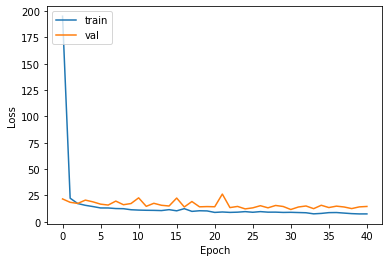

In [114]:
# 7. 학습 시각화하기


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')


plt.show()

In [96]:
# 사이킷런 사용하기

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


L_reg = LinearRegression()
L_reg.fit(x_train, y_train)

y_pred_reg = L_reg.predict(x_test)
print('mae = ', mean_absolute_error(y_pred_reg, y_test))
print('mse = ', mean_squared_error(y_pred_reg, y_test))

mae =  4.799097980123372
mse =  46.038940914242744


In [131]:
from sklearn.tree import DecisionTreeRegressor    #의사결정트리
from sklearn.ensemble import RandomForestRegressor  #랜덤포레스트
from sklearn.neighbors import KNeighborsRegressor   #KNN(K_Nearst_Neighbor)K-최근접이웃
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.svm import SVC    

from sklearn.metrics import accuracy_score     


In [132]:
dt_clf = DecisionTreeRegressor(random_state=0)
rf_clf = RandomForestRegressor(random_state=0)
knn_clf = KNeighborsRegressor()
svm_clf = SVC()

In [144]:
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
rf_pred

array([11.867, 16.231, 15.8  , 23.466, 32.28 , 21.518, 24.804, 20.406,
       25.995, 34.457, 17.339, 20.679, 21.082, 33.083, 20.161, 27.218,
       25.519, 48.032, 18.646, 20.266, 20.288, 17.057, 21.376, 47.302,
       21.492, 30.515, 45.079, 12.71 , 25.742, 15.834, 14.675, 22.211,
       13.395, 14.913, 19.976, 30.263, 22.539, 17.074, 14.923, 16.307,
       27.079, 12.113, 26.282, 22.222, 32.645, 18.927, 12.811, 42.908,
       28.587, 23.739, 33.778])

In [147]:
y_test[:,:]

TypeError: '(slice(None, None, None), slice(None, None, None))' is an invalid key

In [125]:
def fit_clf(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print('ACC_{0}: {1:.4f}'.format(clf, accuracy_score(y_test, pred)))

In [126]:
clf_list = [dt_clf, rf_clf, knn_clf, svm_clf]

for i in clf_list:
    fit_clf(i, x_train, x_test, y_train, y_test)

ValueError: continuous is not supported